In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import pandas as pd
import sunpy
import sunpy.map
from sunpy.coordinates import (get_earth, get_horizons_coord,
                                Helioprojective, propagate_with_solar_surface)
import sunkit_image
import sunkit_image.coalignment as coalignment
import astropy
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import astropy.units as u
import astropy.constants as const
import eispac
from sunraster.instr.spice import read_spice_l2_fits


import cmcrameri.cm as cmcm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import (AutoLocator, AutoMinorLocator, 
    FixedLocator, FixedFormatter, LogLocator, StrMethodFormatter)
from ipywidgets import interactive, widgets
from IPython.display import display, clear_output
from astropy.visualization import (AsinhStretch, LinearStretch,
        LogStretch, ImageNormalize)
import os
from sun_blinker import SunBlinker
import juanfit
from juanfit import SpectrumFitSingle, SpectrumFit2D

In [2]:
spice_raster = read_spice_l2_fits("../../src/SPICE/20221022/lvl2/solo_L2_spice-n-ras_20221022T191302_V05_150995381-059.fits")

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
Set MJD-OBS to 59874.800721 from DATE-OBS.
Set MJD-BEG to 59874.800721 from DATE-BEG.
Set MJD-AVG to 59874.804647 from DATE-AVG.
Set MJD-END to 59874.808570 from DATE-END'. [astropy.wcs.wcs]


In [3]:
spice_raster.keys()

dict_keys(['O III 703 / Mg IX 706 (Merged)', 'Fe XX 721 + O II (Merged)', 'N IV 765 - SH - Comp 8 ... Ne VIII 770 - LH - Comp 8 (Merged)', 'Ly-gamma-CIII group (Merged)', 'Ly Beta 1025 (Merged)', 'O VI 1032 (Merged)'])

In [213]:
spice_MgIX_706_window = spice_raster['O III 703 / Mg IX 706 (Merged)']
spice_FeXX_721_window = spice_raster['Fe XX 721 + O II (Merged)']
spice_NIV_NeVIII_window = spice_raster['N IV 765 - SH - Comp 8 ... Ne VIII 770 - LH - Comp 8 (Merged)']
spice_CIII_window = spice_raster['Ly-gamma-CIII group (Merged)']
spice_OVI_window = spice_raster['O VI 1032 (Merged)']

In [265]:
spice_MgIX_706_window.meta.keys()

dict_keys(['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'NAXIS3', 'NAXIS4', 'EXTEND', 'DATE', '', 'EXTNAME', 'FILENAME', 'STUDYTYP', 'STUDYDES', 'STUDY', 'OBS_MODE', 'OBS_TYPE', 'AUTHOR', 'OBS_ID', 'SPIOBSID', 'OBS_DESC', 'PURPOSE', 'READMODE', 'TRIGGERD', 'TARGET', 'SOOPNAME', 'SOOPTYPE', 'STP', 'SETFILE', 'SETVER', 'APID', 'NRASTERS', 'RASTERNO', 'STUDY_ID', 'MISOSTUD', 'XSTART', 'XPOSURE', 'FOCUSPOS', 'POINT_ID', 'MOSAICID', 'SVO_SEP1', 'SVO_SEP2', 'SVO_SEP3', 'SVO_SEP4', 'SVO_GRP', 'NWIN', 'NWIN_PRF', 'NWIN_DUM', 'NWIN_INT', 'NWIN_ORG', 'PXCOV3', 'WAVECOV', 'TIMESYS', 'DATEREF', 'DATE-BEG', 'DATE-OBS', 'DATE-AVG', 'DATE-END', 'SEQ_BEG', 'TELAPSE', 'OBT_BEG', 'LEVEL', 'CREATOR', 'ORIGIN', 'VERS_SW', 'VERS_CAL', 'VERSION', 'OBSRVTRY', 'INSTRUME', 'CROTA', 'COMPLETE', 'PCT_CMPL', 'STUDYFLG', 'NOSPECTR', 'CALMODE', 'DBLEXP', 'DBLEXPNO', 'DARKMAP', 'BLACKLEV', 'WIN_TYPE', 'DATAPROD', 'TELESCOP', 'DETECTOR', 'WINNO', 'WINTABID', 'MISOWIN', 'WINSHIFT', 'SLIT_ID', 'SLIT_WID', 'DUMBBELL

In [266]:
spice_MgIX_706_window.meta["exposure time"]

<Quantity [5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
           5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
           5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
           5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
           5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
           5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
           5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
           5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.] s>

In [5]:
MgIX_706_window_rebin = spice_MgIX_706_window.rebin((1,40,1,1))[0,0,:,:]

In [32]:
MgIX_706_window_rebin_map = sunpy.map.Map(MgIX_706_window_rebin.data, MgIX_706_window_rebin.meta)

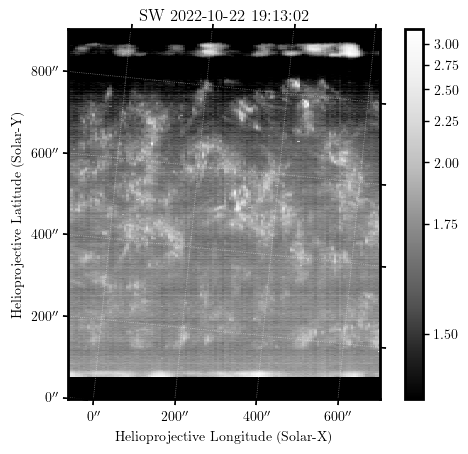

In [46]:
MgIX_706_window_rebin_map.plot(aspect=MgIX_706_window_rebin_map.scale.axis2/MgIX_706_window_rebin_map.scale.axis1,
                               cmap="Greys_r",norm=ImageNormalize(vmin=1.4,vmax=3.2,stretch=AsinhStretch(0.1)))
plt.colorbar()

In [6]:
spice_MgIX_706_window.wcs

WCS Keywords

Number of WCS axes: 4
CTYPE : 'HPLN-TAN' 'HPLT-TAN' 'WAVE' 'TIME' 
CRVAL : 0.07636398766472223 0.1357288951125 7.04006776e-08 339.050193787 
CRPIX : 64.5 415.5 20.5 1.0 
PC1_1 PC1_2 PC1_3 PC1_4  : 0.994947802901 -0.0183720238621 0.0 0.0 
PC2_1 PC2_2 PC2_3 PC2_4  : 0.548598759655 0.994947802901 0.0 0.0 
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0 0.0 1.0 0.0 
PC4_1 PC4_2 PC4_3 PC4_4  : -5.30000305176 0.0 0.0 1.0 
CDELT : 0.0016666666666666666 0.00030500000000000004 1.9503400000000002e-11 1.0 
NAXIS : 128  830  40  1

In [7]:
spice_MgIX_706_window.data.shape

(1, 40, 830, 128)

In [8]:
MgIX_706_window_rebin.wcs

SlicedLowLevelWCS Transformation

This transformation has 2 pixel and 3 world dimensions

Array shape (Numpy order): (830, 128)

Pixel Dim  Axis Name  Data size  Bounds
        0  None             128  None
        1  None             830  None

World Dim  Axis Name                                                          Physical Type                   Units
        0  Helioprojective longitude (Solar X), increases towards Solar West  custom:pos.helioprojective.lon  deg
        1  Helioprojective latitude (Solar Y), increases towards Solar North  custom:pos.helioprojective.lat  deg
        2  Time (Degenerate Dimension)                                        time                            s

Correlation between pixel and world axes:

           Pixel Dim
World Dim    0    1
        0  yes  yes
        1  yes  yes
        2  yes   no

In [9]:
MgIX_706_window_wvl = spice_MgIX_706_window.wcs.slice((0,slice(0,40),0,0)).pixel_to_world(np.arange(40)).value

In [27]:
MgIX_706_window_data_test = spice_MgIX_706_window.data[0,:,670,96]

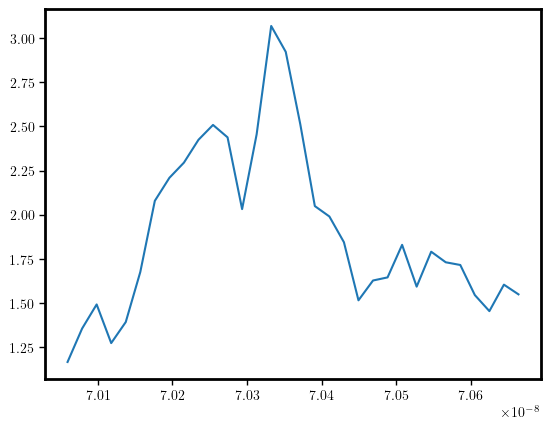

In [38]:
plt.plot(MgIX_706_window_wvl, MgIX_706_window_data_test)

In [47]:
spice_NIV_NeVIII_window.wcs

WCS Keywords

Number of WCS axes: 4
CTYPE : 'HPLN-TAN' 'HPLT-TAN' 'WAVE' 'TIME' 
CRVAL : 0.07636398766472223 0.1357288951125 7.669052410000001e-08 339.050193787 
CRPIX : 64.5 415.5 36.5 1.0 
PC1_1 PC1_2 PC1_3 PC1_4  : 0.994947802901 -0.0183720238621 0.0 0.0 
PC2_1 PC2_2 PC2_3 PC2_4  : 0.548598759655 0.994947802901 0.0 0.0 
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0 0.0 1.0 0.0 
PC4_1 PC4_2 PC4_3 PC4_4  : -5.30000305176 0.0 0.0 1.0 
CDELT : 0.0016666666666666666 0.00030500000000000004 1.9503400000000002e-11 1.0 
NAXIS : 128  830  72  1

In [103]:
NIV_NeVIII_window_rebin = spice_NIV_NeVIII_window.rebin((1,72,1,1))[0,0,:,:]

In [104]:
NIV_NeVIII_window_rebin_map = sunpy.map.Map(NIV_NeVIII_window_rebin.data, NIV_NeVIII_window_rebin.meta)

In [105]:
NIV_NeVIII_window_rebin_map.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'HPLN-TAN' 'HPLT-TAN' 
CRVAL : 0.076363987664722 0.1357288951125 
CRPIX : 64.5 415.5 
PC1_1 PC1_2  : 0.994947802901 -0.0183720238621 
PC2_1 PC2_2  : 0.548598759655 0.994947802901 
CDELT : 0.0016666666666667 0.000305 
NAXIS : 128  830

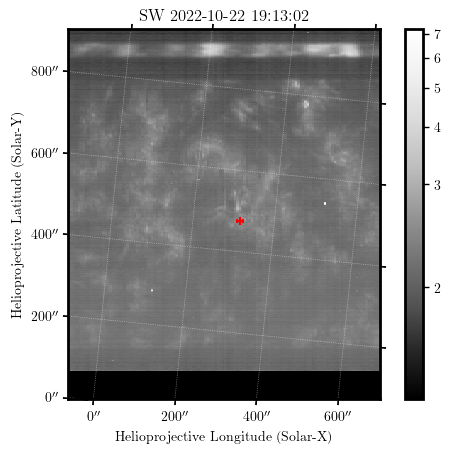

In [106]:
NIV_NeVIII_window_rebin_map.plot(aspect=NIV_NeVIII_window_rebin_map.scale.axis2/NIV_NeVIII_window_rebin_map.scale.axis1,
                                 cmap="Greys_r",norm=ImageNormalize(vmin=1.4,vmax=7.2,stretch=AsinhStretch(0.1)))
plt.colorbar()
plt.scatter(70,400,marker="+",color="red")

In [150]:
NIV_NeVIII_window_wvl = spice_NIV_NeVIII_window.wcs.slice((0,slice(0,72),0,0)).pixel_to_world(np.arange(72)).value*1e10

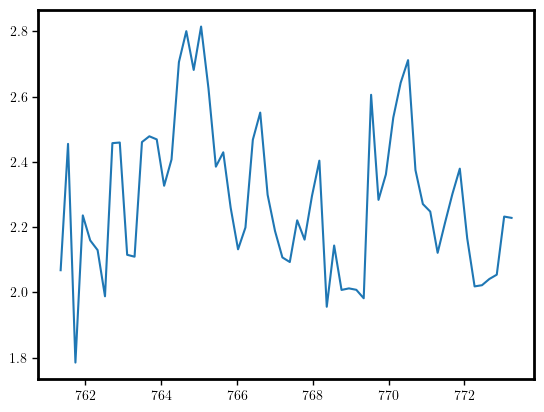

In [211]:
plt.plot(NIV_NeVIII_window_wvl, spice_NIV_NeVIII_window.data[0,:,160,70])

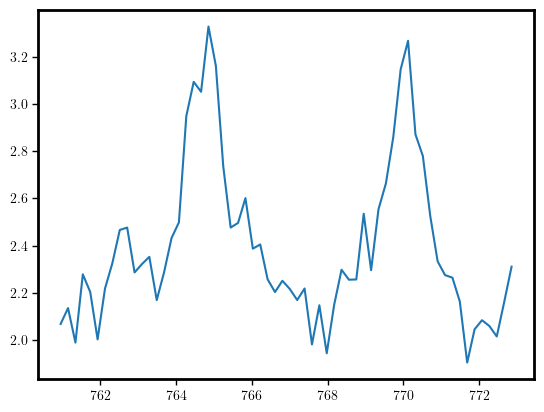

In [151]:
plt.plot(NIV_NeVIII_window_wvl, spice_NIV_NeVIII_window.data[0,:,400,70])

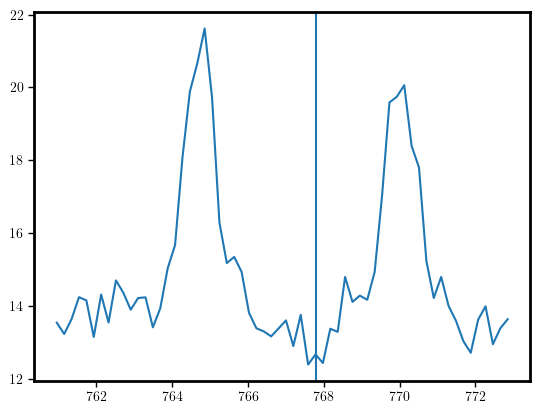

In [170]:
plt.plot(NIV_NeVIII_window_wvl, np.sum(spice_NIV_NeVIII_window.data[0,:,400,70:76],axis=1))
plt.axvline(NIV_NeVIII_window_wvl[40])

In [184]:
NIV_NeVIII_window_rebin_spatial = spice_NIV_NeVIII_window[:,:,84:-110,:].rebin((1,1,6,1))[0,:,:,:]

In [233]:
NIV_NeVIII_window_rebin_spatial_wcs = NIV_NeVIII_window_rebin_map.wcs.slice((np.s_[86:-110:6],np.s_[:]))

In [189]:
NIV_NeVIII_window_rebin_spatial.data.shape

(72, 106, 128)

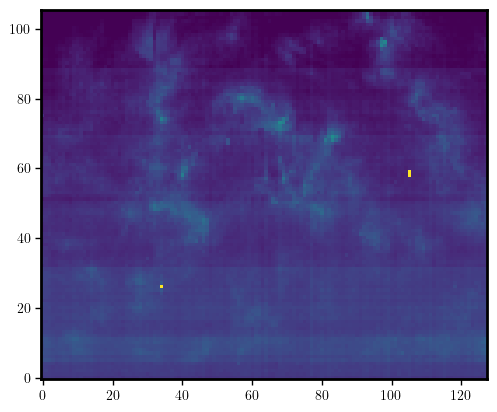

In [209]:
plt.imshow(np.nansum(NIV_NeVIII_window_rebin_spatial.data[40:,:,:],axis=0),origin="lower",vmin=50,vmax=120)

/home/yjzhu/scripts/MyPy/juanfit.py:221: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


<Axes: ylabel='Intensity'>

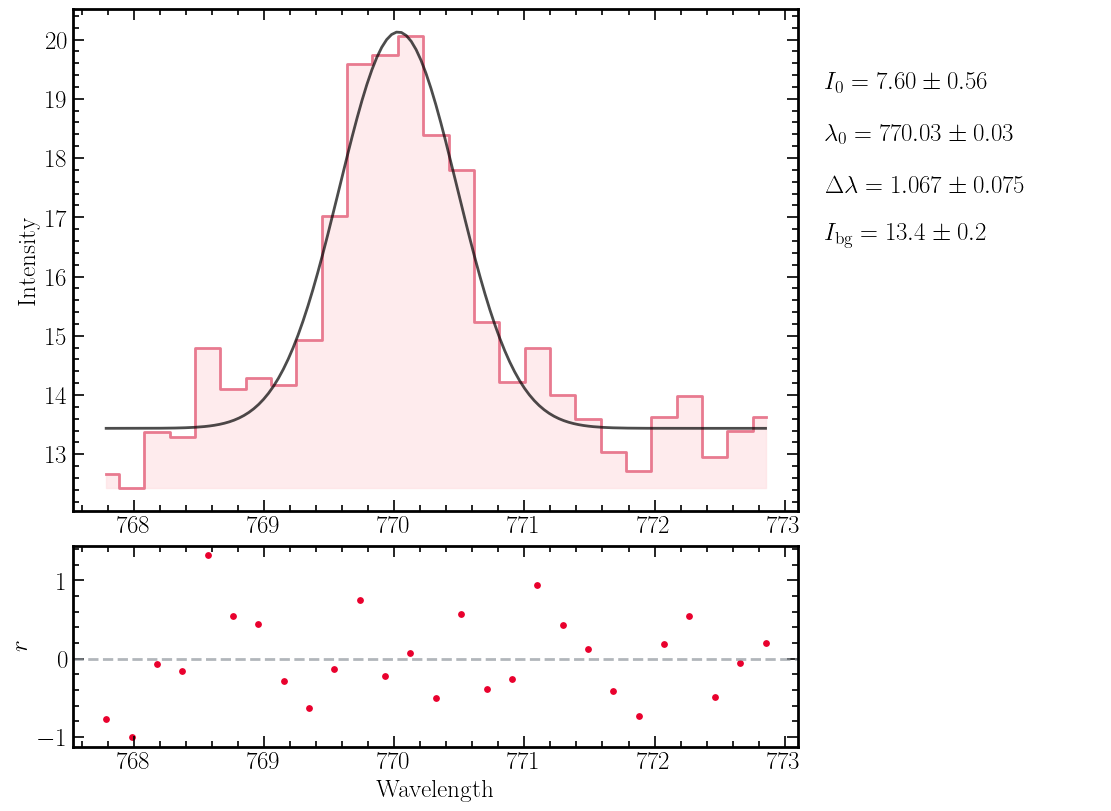

In [191]:
NeVIII_fit_test = SpectrumFitSingle(np.nansum(spice_NIV_NeVIII_window.data[0,:,400,70:76],axis=1)[40:67], NIV_NeVIII_window_wvl[40:67],
                                line_number=1,line_wvl_init=[770],int_max_init=10,int_cont_init=10,fwhm_init=0.2,
                                same_width=False)
NeVIII_fit_test.run_lse()
NeVIII_fit_test.plot()

In [194]:
NeVIII_fitmodel = SpectrumFit2D(NIV_NeVIII_window_rebin_spatial.data[40:67,:,:].transpose((1,2,0)), NIV_NeVIII_window_wvl[40:67],
                                line_number=1,line_wvl_init=[770],int_max_init=10,fwhm_init=1,
                                same_width=False)
NeVIII_fitmodel.run_lse_mp(prev_init=False)

/home/yjzhu/scripts/MyPy/juanfit.py:221: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
/home/yjzhu/scripts/MyPy/juanfit.py:221: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
/home/yjzhu/scripts/MyPy/juanfit.py:221: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
/home/yjzhu/scripts/MyPy/juanfit.py:221: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
/home/yjzhu/scripts/MyPy/juanfit.py:221: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=Fa

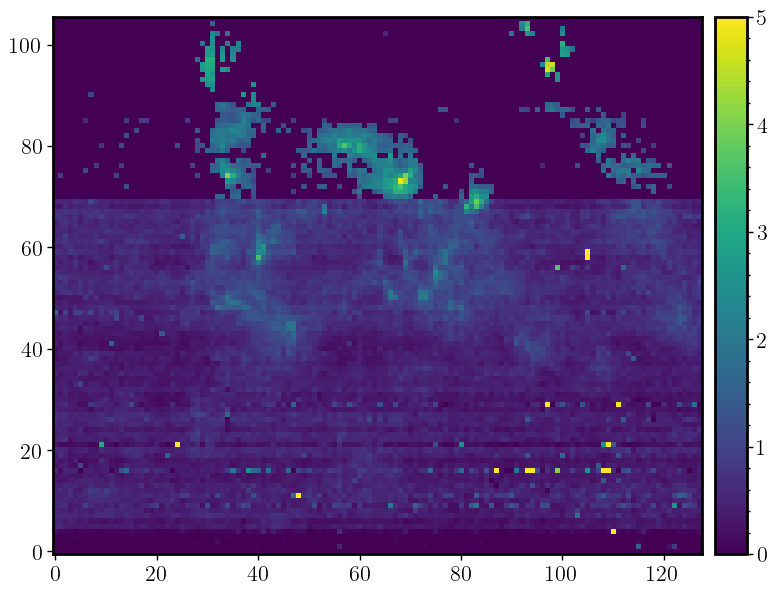

In [195]:
NeVIII_fitmodel.plot_fit2d(param="int",vmin=0,vmax=5)

In [214]:
spice_CIII_window.wcs

WCS Keywords

Number of WCS axes: 4
CTYPE : 'HPLN-TAN' 'HPLT-TAN' 'WAVE' 'TIME' 
CRVAL : 0.07636398766472223 0.1357288951125 9.7419395e-08 339.050193787 
CRPIX : 64.5 415.5 30.5 1.0 
PC1_1 PC1_2 PC1_3 PC1_4  : 0.994947802901 -0.0183720238621 0.0 0.0 
PC2_1 PC2_2 PC2_3 PC2_4  : 0.548598759655 0.994947802901 0.0 0.0 
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0 0.0 1.0 0.0 
PC4_1 PC4_2 PC4_3 PC4_4  : -5.30000305176 0.0 0.0 1.0 
CDELT : 0.0016666666666666666 0.00030500000000000004 1.9246e-11 1.0 
NAXIS : 128  830  60  1

In [216]:
CIII_window_rebin = spice_CIII_window.rebin((1,60,1,1))[0,0,:,:]

In [217]:
CIII_window_rebin_map = sunpy.map.Map(CIII_window_rebin.data, CIII_window_rebin.meta)

In [218]:
CIII_window_rebin_map.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'HPLN-TAN' 'HPLT-TAN' 
CRVAL : 0.076363987664722 0.1357288951125 
CRPIX : 64.5 415.5 
PC1_1 PC1_2  : 0.994947802901 -0.0183720238621 
PC2_1 PC2_2  : 0.548598759655 0.994947802901 
CDELT : 0.0016666666666667 0.000305 
NAXIS : 128  830

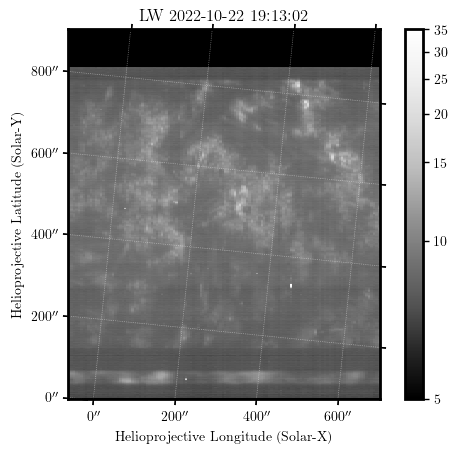

In [222]:
CIII_window_rebin_map.plot(aspect=CIII_window_rebin_map.scale.axis2/CIII_window_rebin_map.scale.axis1,
                            cmap="Greys_r",norm=ImageNormalize(vmin=5,vmax=35,stretch=AsinhStretch(0.1)))
plt.colorbar()

In [223]:
CIII_window_wvl = spice_CIII_window.wcs.slice((0,slice(0,60),0,0)).pixel_to_world(np.arange(60)).value*1e10

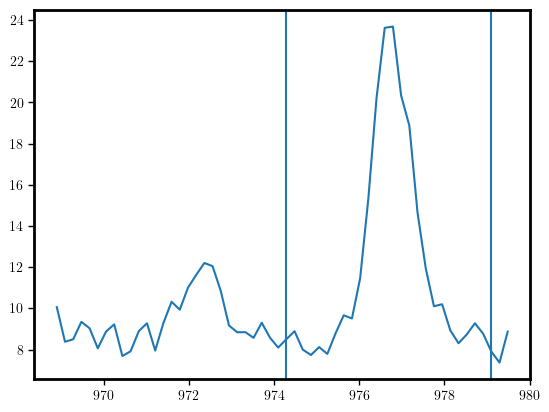

In [229]:
plt.plot(CIII_window_wvl, spice_CIII_window.data[0,:,400,70])
plt.axvline(CIII_window_wvl[30])
plt.axvline(CIII_window_wvl[55])

In [226]:
CIII_window_rebin_spatial = spice_CIII_window[:,:,144:-86,:].rebin((1,1,6,1))[0,:,:,:]

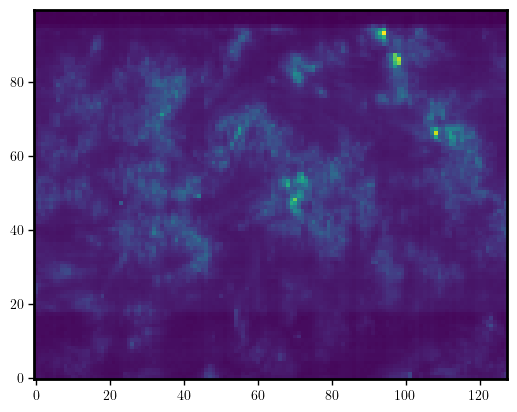

In [230]:
plt.imshow(np.nansum(CIII_window_rebin_spatial.data[30:,:,:],axis=0),origin="lower")

In [232]:
CIII_window_rebin_spatial_wcs = CIII_window_rebin_map.wcs.slice((np.s_[146:-86:6],np.s_[:]))

In [238]:
CIII_fitmodel = SpectrumFit2D(CIII_window_rebin_spatial.data[30:,:,:].transpose((1,2,0)), CIII_window_wvl[30:],
                                line_number=1,line_wvl_init=[977],int_max_init=10,fwhm_init=1,
                                same_width=False)
CIII_fitmodel.run_lse_mp(prev_init=False)

/home/yjzhu/scripts/MyPy/juanfit.py:221: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
/home/yjzhu/scripts/MyPy/juanfit.py:221: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
/home/yjzhu/scripts/MyPy/juanfit.py:221: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
/home/yjzhu/scripts/MyPy/juanfit.py:221: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
/home/yjzhu/scripts/MyPy/juanfit.py:221: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=Fa

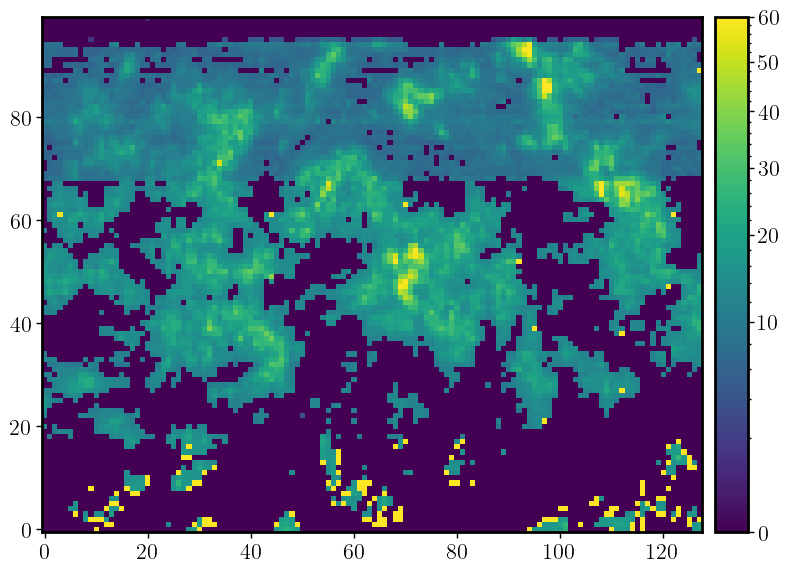

In [243]:
CIII_fitmodel.plot_fit2d(param="int",vmin=0,vmax=60,scale="sqrt")

In [250]:
spice_OVI_window.wcs

WCS Keywords

Number of WCS axes: 4
CTYPE : 'HPLN-TAN' 'HPLT-TAN' 'WAVE' 'TIME' 
CRVAL : 0.07636398766472223 0.1357288951125 1.0315470300000001e-07 339.050193787 
CRPIX : 64.5 415.5 16.0 1.0 
PC1_1 PC1_2 PC1_3 PC1_4  : 0.994947802901 -0.0183720238621 0.0 0.0 
PC2_1 PC2_2 PC2_3 PC2_4  : 0.548598759655 0.994947802901 0.0 0.0 
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0 0.0 1.0 0.0 
PC4_1 PC4_2 PC4_3 PC4_4  : -5.30000305176 0.0 0.0 1.0 
CDELT : 0.0016666666666666666 0.00030500000000000004 1.9246e-11 1.0 
NAXIS : 128  830  31  1

In [251]:
OVI_window_rebin = spice_OVI_window.rebin((1,31,1,1))[0,0,:,:]

In [252]:
OVI_window_rebin_map = sunpy.map.Map(OVI_window_rebin.data, OVI_window_rebin.meta)

In [253]:
OVI_window_rebin_map.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'HPLN-TAN' 'HPLT-TAN' 
CRVAL : 0.076363987664722 0.1357288951125 
CRPIX : 64.5 415.5 
PC1_1 PC1_2  : 0.994947802901 -0.0183720238621 
PC2_1 PC2_2  : 0.548598759655 0.994947802901 
CDELT : 0.0016666666666667 0.000305 
NAXIS : 128  830

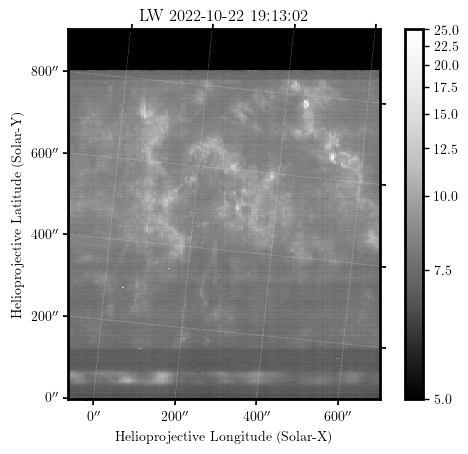

In [259]:
OVI_window_rebin_map.plot(aspect=OVI_window_rebin_map.scale.axis2/OVI_window_rebin_map.scale.axis1,
                            cmap="Greys_r",norm=ImageNormalize(vmin=5,vmax=25,stretch=AsinhStretch(0.1)))
plt.colorbar()

In [260]:
OVI_window_wvl = spice_OVI_window.wcs.slice((0,slice(0,31),0,0)).pixel_to_world(np.arange(31)).value*1e10

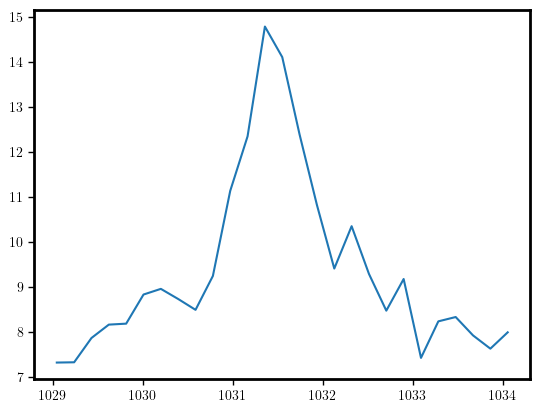

In [261]:
plt.plot(OVI_window_wvl, spice_OVI_window.data[0,:,400,70])

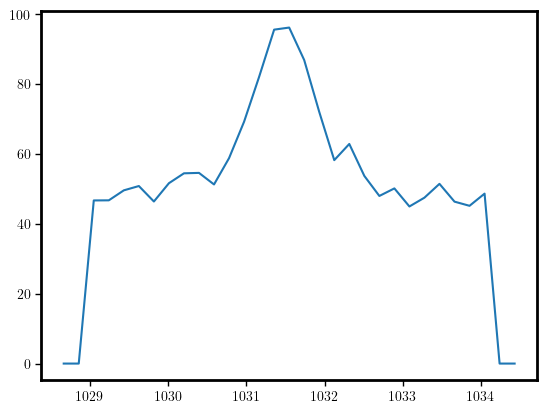

In [263]:
plt.plot(OVI_window_wvl, np.nansum(spice_OVI_window.data[0,:,400,70:76],axis=1))